<a href="https://colab.research.google.com/github/Diya910/Deep_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(test_images))

10000


In [ ]:
print(train_images[0].shape)

(28, 28)


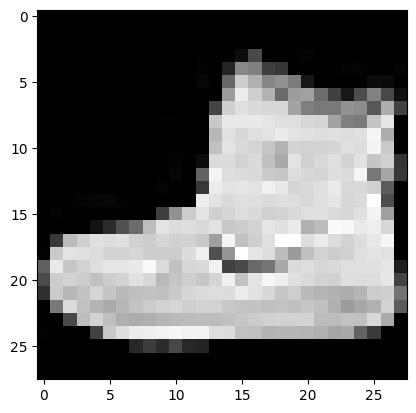

In [ ]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 13s 5ms/step - loss: 0.5406 - accuracy: 0.8003 - val_loss: 0.3701 - val_accuracy: 0.8645
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3421 - accuracy: 0.8760 - val_loss: 0.3289 - val_accuracy: 0.8817
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2932 - accuracy: 0.8938 - val_loss: 0.2938 - val_accuracy: 0.8914
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2605 - accuracy: 0.9039 - val_loss: 0.3114 - val_accuracy: 0.8873
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2389 - accuracy: 0.9121 - val_loss: 0.2659 - val_accuracy: 0.9047
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2132 - accuracy: 0.9216 - val_loss: 0.2650 - val_accuracy: 0.9062
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1979 - accuracy: 0.9269 - val_loss: 0.2628 - val_accuracy: 0.9069
Ep

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.2970 - accuracy: 0.9028 - 705ms/epoch - 2ms/step


In [ ]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
